<a href="https://colab.research.google.com/github/YannnLing/CHN_REC/blob/main/Chinese_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自學 - 繁體中文手寫辨識


In [25]:
#!git clone https://github.com/chenkenanalytic/handwritting_data_all.git

In [26]:
#!cat /content/handwritting_data_all/all_data.zip* > /content/handwritting_data_all/all_data.zip

In [27]:
#!unzip -O big5 /content/handwritting_data_all/all_data.zip -d "/content"

### 匯入套件

In [28]:
from platform import python_version
import os
import shutil
import numpy as np
import pandas as pd
# import PIL.Imag
from matplotlib import pyplot as plt
from matplotlib.font_manager import findfont, FontProperties

### 繁體中文顯示設定


In [29]:
default_type = findfont(FontProperties(family = FontProperties().get_family()))
ttf_path = '/'.join( default_type.split('/')[:-1] )  # 預設字型的資料夾路徑

os.chdir( '/content' )                               # 將當前工作目錄切換到 /content，這是 Google Colab 的預設工作目錄。
if not os.path.exists( '/content/matplotlib_Display_Chinese_in_Colab' ):         # 檢查 /content 目錄下是否已經存在 matplotlib_Display_Chinese_in_Colab 這個資料夾。
    !git clone https://github.com/YenLinWu/matplotlib_Display_Chinese_in_Colab   # 如果 matplotlib_Display_Chinese_in_Colab 資料夾不存在，這行程式碼會執行 git clone 命令，
                                                                                  # 從 GitHub 上複製 matplotlib_Display_Chinese_in_Colab 專案到本地的 /content 目錄中。
os.chdir( '/content/matplotlib_Display_Chinese_in_Colab' )
for item in os.listdir():                            # os.listdir():返回包含目錄中所有檔案和子目錄名稱的列表。
    if item.endswith( '.ttf' ):                      # 檢查是否以".ttf"結尾，是則返回TRUE，否返回FALSE。
        msj_ttf_path = os.path.abspath( item )       # os.path.abspath 會將相對路徑轉換為絕對路徑。
        msj_name = msj_ttf_path.split('/')[-1]       # 檔案路徑取最後一個斜線後的字串。


Cloning into 'matplotlib_Display_Chinese_in_Colab'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 13.26 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [30]:
try:
    shutil.move( msj_ttf_path, ttf_path )     # 將 msj_ttf_path（找到的字型檔案的絕對路徑）移動到 ttf_path（預設字型資料夾路徑）
except:                                       # 這樣可以確保該字型檔案可以被 matplotlib 使用。
    pass
finally:                                      # 無論 try 區塊中是否發生例外情況都會執行。
    os.chdir( '/content' )
    shutil.rmtree( '/content/matplotlib_Display_Chinese_in_Colab' )   # 刪除 /content/matplotlib_Display_Chinese_in_Colab 目錄及其所有內容。

font = FontProperties( fname=ttf_path+'/'+msj_name )                  # 設定字型屬性

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import *

print( 'Python Version: ', python_version() )
print( 'TensorFlow Version: ', tf.__version__ )

Python Version:  3.10.12
TensorFlow Version:  2.15.0


### 下載繁體中文手寫資料集

In [32]:
!git clone https://github.com/AI-FREE-Team/Traditional-Chinese-Handwriting-Dataset.git

fatal: destination path 'Traditional-Chinese-Handwriting-Dataset' already exists and is not an empty directory.


In [33]:
import os
import zipfile
import shutil

OutputFolder = '/content/Handwritten_Data'

In [34]:
if not os.path.exists(OutputFolder):   # 檢查指定的路徑是否存在，為Boolean
  os.mkdir(OutputFolder)               # 創建OutputFolder資料夾
  print( f'Create the new "{OutputFolder}" folder' )   # f 字符串用來格式化輸出，將 OutputFolder 的值插入到字符串中。

os.chdir(OutputFolder)

### 檢查路徑 : 顯示當前工作目錄的完整路徑
!pwd

/content/Handwritten_Data


In [35]:
CompressedFiles = []

os.chdir('/content/Traditional-Chinese-Handwriting-Dataset/data')

for item in os.listdir():   # os.listdir() 函數返回一個包含目錄中所有文件和目錄名稱的列表。
  if item.endswith('.zip'): # Check for ".zip" extension.
    file_path = os.path.abspath(item) # Get full path of the compressed file.
    CompressedFiles.append(file_path)

for file in CompressedFiles:
  # Construct a ZipFile object with the filename, and then extract it.
  zip_ref = zipfile.ZipFile(file).extractall(OutputFolder)   # 將 file 壓縮文件中的所有內容解壓到 OutputFolder 目錄中。

  source_path = OutputFolder + '/cleaned_data(50_50)'
  img_list = os.listdir(source_path)

  for img in img_list:
      shutil.move(source_path + '/' + img, OutputFolder) # Move a file to another location.

  shutil.rmtree(OutputFolder + '/cleaned_data(50_50)')
  print(f'Decompress successfully {file} ......')

print( 'Moving images according to traditional Chinese characters......' )

Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-001.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-004.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-003.zip ......
Decompress successfully /content/Traditional-Chinese-Handwriting-Dataset/data/cleaned_data(50_50)-20200420T071507Z-002.zip ......
Moving images according to traditional Chinese characters......


In [36]:
ImageList = os.listdir(OutputFolder)
ImageList = [img for img in ImageList if len(img)>1]
WordList = list(set([w.split('_')[0] for w in ImageList]))

for w in WordList:
  try:
    os.chdir(OutputFolder) # Change the current working directory to OutputPath.
    os.mkdir(w) # Create the new word folder in OutputPath.
    MoveList = [img for img in ImageList if w in img]

  except:
    os.chdir(OutputFolder)
    MoveList = [ img for img in ImageList if w in img ]

  finally:
    for img in MoveList:
      old_path = OutputFolder + '/' + img
      new_path = OutputFolder + '/' + w + '/' + img
      shutil.move( old_path, new_path )

print( 'Data Deployment completed.' )

Data Deployment completed.


In [37]:
a=0
b=0

for item in os.listdir(OutputFolder):
  a += 1
  for i in os.listdir(OutputFolder + '/' + item):
    b +=1


print('總共: ' + str(a) + ' 個字(資料夾) / 總共: ' + str(b) + '個樣本')
print('平均每個字有: ' + str(b/a) + ' 個樣本')

總共: 4803 個字(資料夾) / 總共: 250712個樣本
平均每個字有: 52.19904226525089 個樣本


###訓練集和測試集

In [38]:
os.chdir('/content')
os.mkdir('Traditional_Chinese_Testing_Data')
os.chdir('/content/Traditional_Chinese_Testing_Data')

!git clone https://github.com/AI-FREE-Team/Handwriting-Chinese-Characters-Recognition

FileExistsError: [Errno 17] File exists: 'Traditional_Chinese_Testing_Data'

In [ ]:
'''
RawDataPath: 繁中手寫資料集路徑
TraningDataPath: 訓練集路徑
TestingDataPath: 自製繁中手寫資料集路徑
'''
RawDataPath = '/content/Handwritten_Data'
TraningDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/train data'
TestingDataPath = '/content/Traditional_Chinese_Testing_Data/Handwriting-Chinese-Characters-Recognition/test data'

os.chdir( RawDataPath )
print( 'Current working directory:', os.getcwd() )

####訓練集

In [ ]:
SelectedWords = [ '人', '工', '智', '慧' ]

os.chdir( RawDataPath )
try:
    os.mkdir( TraningDataPath )

except:
    shutil.rmtree( TraningDataPath )
    os.mkdir( TraningDataPath )

finally:
    nonexistence = []
    for c in SelectedWords:
        try:
            shutil.copytree( RawDataPath+'/'+c, TraningDataPath+'/'+c )
        except:
            nonexistence.append( c )

    if len(nonexistence)>1:
        print( f'There are {len(nonexistence)} characters that are not in dataset. \n{nonexistence}' )
    elif len(nonexistence)==1:
        print( f'There is {len(nonexistence)} character that is not in dataset. \n{nonexistence}' )
    else: print('')

In [ ]:
def Loading_Image( image_path ):
    img = load_img( image_path )         # 從指定的文件路徑加載圖像並返回圖像。
    img = tf.constant( np.array(img) )   # np.array(img) 將圖像對象轉換為 NumPy 數組。
    return img

def Show( image, title=None ) :
    if len( image.shape )>3 :
        image = tf.squeeze( image, axis=0 )   # 如果圖像的形狀（shape）中有超過三個維度，則使用 tf.squeeze 函數將其壓縮為三維。

    plt.imshow( image )
    if title:
        plt.title( title, fontproperties=font )

img_list = []
for c in SelectedWords :
    folder_path = TraningDataPath+'/'+c
    file_names = os.listdir( folder_path )
    for i in range(5) :
        img_list.append( folder_path+'/'+file_names[i] )

plt.gcf().set_size_inches( (12,12) )    # 設置當前圖形尺寸
for i in range(20):
    plt.subplot(4,5,i+1)
    title = img_list[i].split('/')[-1].split('_')[-2]
    img = Loading_Image( img_list[i] )
    Show( img, title )

### 超參數

In [ ]:
Num_Classes = len(SelectedWords)
Image_Size = ( 50, 50 )
Epochs = 50
Batch_Size = 8

###Data Augamentation

####訓練集

In [ ]:
Train_Data_Genetor = ImageDataGenerator( rescale = 1./255,                      # 將圖像的像素值縮放到0-1之間。通常圖像像素值在0-255之間，除以255后，所有像素值都在0-1範圍内。
                                         validation_split = 0.2,                # 將數據集分成訓練集和驗證集，其中20%的數據將用於驗證，其餘80%用於訓練。
                                         width_shift_range = 0.05,              # 隨機水平平移圖像，平移幅度在圖像總寬度的5%之内。這個参數增强了圖像的鲁棒性，使模型能夠更好地適應位置變化。
                                         height_shift_range = 0.05,             # 隨機垂直平移圖像，平移幅度在圖像總高度的5%之内。與水平平移類似，增強了模型對位置變化的適應能力。
                                         zoom_range = 0.1,                      # 隨機縮放圖像，縮放範圍在90%到110%之間。這個参数可以讓模型更好地適應不同大小的對象。
                                         horizontal_flip = False )              # 不隨機水平翻轉圖像。如果設置为True，圖像将有50%的機率進行水平翻轉。

In [ ]:
Train_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                          target_size = Image_Size,     # 將所有圖像調整為指定大小
                                                          batch_size = Batch_Size,      # 批次大小，每次生成的圖像數目
                                                          class_mode = 'categorical',   # 類别模式，將標籤轉換為分類格式（用於多分類）
                                                          shuffle = True,               # 是否隨機打亂數據順序
                                                          subset = 'training' )         # 使用數據集的訓練子集

In [ ]:
def Plot_Genetor( imgs, labels=[], grid=(1,10), size=(20,2) ):
    n = len( imgs )
    plt.gcf().set_size_inches(size)     # plt.gcf():返回當前的圖形對象;set_size_inches:設置當前圖形的大小
    for i in range(n):
        ax = plt.subplot( grid[0], grid[1], i+1 )   # grid[0] 和 grid[1] 分別指定了子圖的行數和列數。
        ax.imshow( imgs[i] )
        if len(labels):
            ax.set_title( f'Label={labels[i]}' )
        ax.set_xticks([]); ax.set_yticks([])
    plt.show()

batch = 1
for data, label in Train_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > len(Train_Generator):
        break

print( f'There are {len(Train_Generator)} batches.' )

#### 驗證集

In [ ]:
Val_Data_Genetor = ImageDataGenerator( rescale=1./255, validation_split = 0.2 )

In [ ]:
Val_Generator = Train_Data_Genetor.flow_from_directory( TraningDataPath ,
                                                        target_size = Image_Size,
                                                        batch_size = Batch_Size,
                                                        class_mode = 'categorical',
                                                        shuffle = True,
                                                        subset = 'validation' )

### 建立及編譯模型

In [40]:
CNN = Sequential( name = 'CNN_Model' )
CNN.add( Conv2D( 5, kernel_size = (2,2), padding = 'same',
                 input_shape = (Image_Size[0],Image_Size[1],3), name = 'Convolution' ) )
CNN.add( MaxPooling2D( pool_size = (2,2), name = 'Pooling' ) )
CNN.add( Flatten( name = 'Flatten' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_1' ) )
CNN.add( Dense( 512, activation = 'relu', name = 'Dense' ) )
CNN.add( Dropout( 0.5, name = 'Dropout_2' ) )
CNN.add( Dense( Num_Classes, activation = 'softmax', name = 'Softmax' ) )
CNN.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution (Conv2D)        (None, 50, 50, 5)         65        
                                                                 
 Pooling (MaxPooling2D)      (None, 25, 25, 5)         0         
                                                                 
 Flatten (Flatten)           (None, 3125)              0         
                                                                 
 Dropout_1 (Dropout)         (None, 3125)              0         
                                                                 
 Dense (Dense)               (None, 512)               1600512   
                                                                 
 Dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 Softmax (Dense)             (None, 4)                 20

In [41]:
CNN.compile( optimizer = Adam(),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'] )

### 訓練及儲存模型

In [42]:
History = CNN.fit( Train_Generator,
                   steps_per_epoch = Train_Generator.samples//Batch_Size,
                   validation_data = Val_Generator,
                   validation_steps = Val_Generator.samples//Batch_Size,
                   epochs = Epochs )

Epoch 1/50
20/20 [==============================] - 2s 53ms/step - loss: 1.6132 - accuracy: 0.3654 - val_loss: 1.0663 - val_accuracy: 0.4750
Epoch 2/50
20/20 [==============================] - 1s 37ms/step - loss: 1.0463 - accuracy: 0.5705 - val_loss: 0.7904 - val_accuracy: 0.6750
Epoch 3/50
20/20 [==============================] - 1s 40ms/step - loss: 0.7339 - accuracy: 0.7051 - val_loss: 0.7677 - val_accuracy: 0.6250
Epoch 4/50
20/20 [==============================] - 1s 36ms/step - loss: 0.6021 - accuracy: 0.7244 - val_loss: 0.6939 - val_accuracy: 0.6750
Epoch 5/50
20/20 [==============================] - 1s 41ms/step - loss: 0.4500 - accuracy: 0.8077 - val_loss: 0.5148 - val_accuracy: 0.7750
Epoch 6/50
20/20 [==============================] - 1s 37ms/step - loss: 0.4387 - accuracy: 0.8269 - val_loss: 0.4453 - val_accuracy: 0.8500
Epoch 7/50
20/20 [==============================] - 1s 37ms/step - loss: 0.3323 - accuracy: 0.8718 - val_loss: 0.4643 - val_accuracy: 0.8250
Epoch 8/50
20

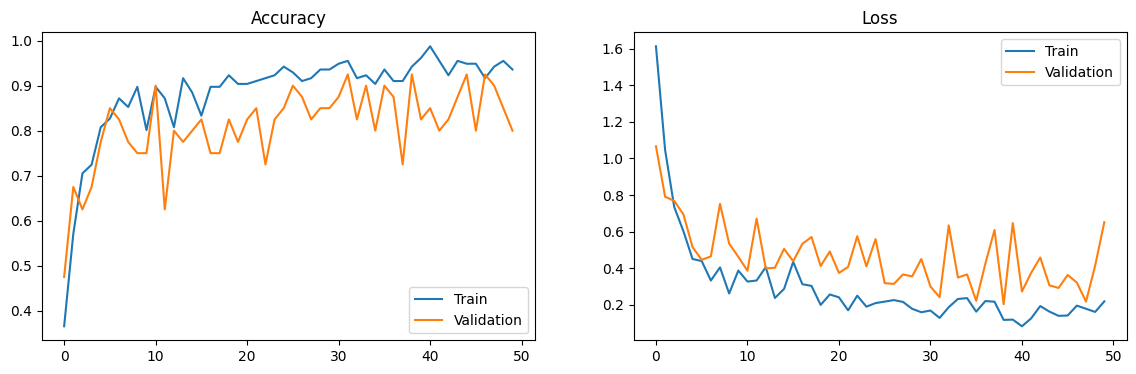

In [44]:
Train_Accuracy = History.history['accuracy']
Val_Accuracy = History.history['val_accuracy']
Train_Loss = History.history['loss']
Val_Loss = History.history['val_loss']
epochs_range = range(Epochs)

plt.figure( figsize=(14,4) )
plt.subplot( 1,2,1 )
plt.plot( range( len(Train_Accuracy) ), Train_Accuracy, label='Train' )
plt.plot( range( len(Val_Accuracy) ), Val_Accuracy, label='Validation' )
plt.legend( loc='lower right' )
plt.title( 'Accuracy' )

plt.subplot( 1,2,2 )
plt.plot( range( len(Train_Loss) ), Train_Loss, label='Train' )
plt.plot( range( len(Val_Loss) ), Val_Loss, label='Validation' )
plt.legend( loc='upper right' )
plt.title( 'Loss')

plt.show()

### 儲存模型

In [45]:
os.chdir( '/content' )
CNN.save( 'CNN_Model.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 自製繁中手寫測試集預測

## 建立自製測試集的生成器( Generator )及走訪器( Iterator )

In [46]:
Test_Data_Genetor = ImageDataGenerator( rescale=1./255 )
Test_Generator = Test_Data_Genetor.flow_from_directory( TestingDataPath,
                                                        target_size = Image_Size,
                                                        shuffle = False,
                                                        class_mode = 'categorical' )

Found 8 images belonging to 4 classes.


batch 1: 
 shape of images: (8, 50, 50, 3) 
 shape of labels: (8, 4)


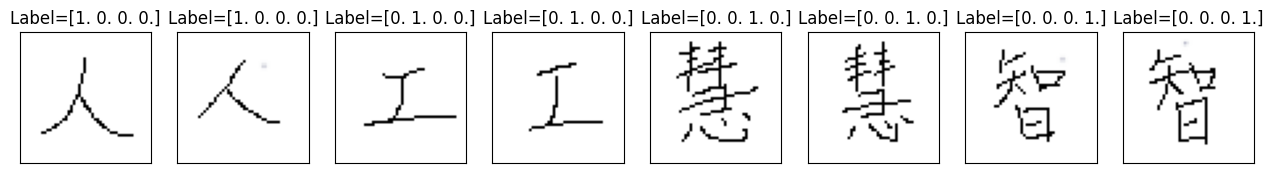

In [47]:
batch = 1
for data, label in Test_Generator:
    print( f'batch {batch}: \n shape of images: {data.shape} \n shape of labels: {label.shape}' )
    Plot_Genetor( data, label )
    batch += 1
    if batch > 1:
        break

## 載入模型且預測

In [48]:
Test_Generator.reset()

Predicts=CNN.predict(Test_Generator,verbose=1, steps =8)

1/8 [==>...........................] - ETA: 0s

8/8 [==============================] - 0s 3ms/step


## 檢視預測結果

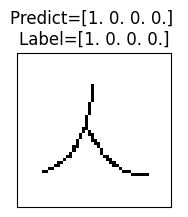

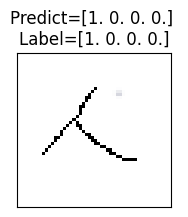

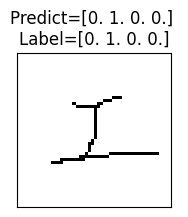

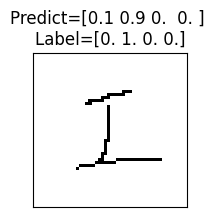

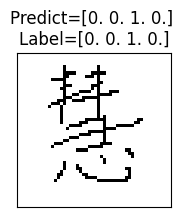

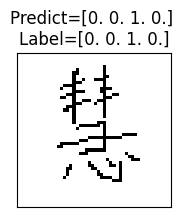

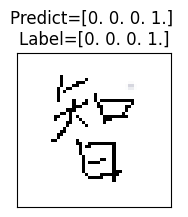

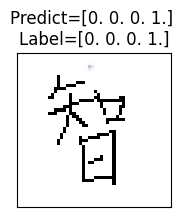

In [49]:
test_data, test_label = Test_Generator.next()

def Plot_Predict( img, labels=[], predicts=[], size=(20,2) ):
    plt.gcf().set_size_inches(size)
    ax = plt.subplot( )
    ax.imshow( img )
    ax.set_title( f'Predict={predicts.round(1)} \nLabel={labels}' )
    ax.set_xticks([]); ax.set_yticks([])
    plt.show()

for data, label, predict_label in zip(test_data,  test_label, Predicts):
    Plot_Predict( data, label, predict_label )

## 其他做法

 - 無分類資料夾預測方法

In [50]:
os.mkdir('test')

for i in os.listdir(TestingDataPath):
  folder = TestingDataPath + '/' + i
  for f in os.listdir(folder):
    img_file = folder + '/' + f
    shutil.copyfile(img_file,'/content/test/' + f)

1/1 [==============================] - 0s 213ms/step


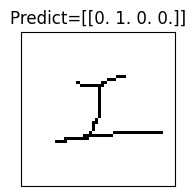

工_001.png
1/1 [==============================] - 0s 37ms/step


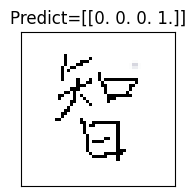

智_001.png
1/1 [==============================] - 0s 50ms/step


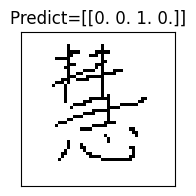

慧_001.png
1/1 [==============================] - 0s 61ms/step


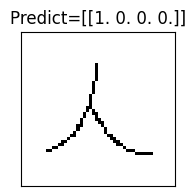

人_001.png
1/1 [==============================] - 0s 90ms/step


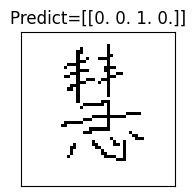

慧_002.png
1/1 [==============================] - 0s 71ms/step


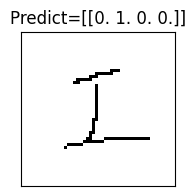

工_002.png
1/1 [==============================] - 0s 48ms/step


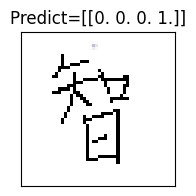

智_002.png
1/1 [==============================] - 0s 111ms/step


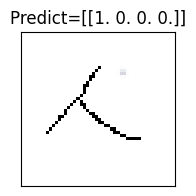

人_002.png


In [51]:
from keras.preprocessing import image

directory = os.fsencode('/content/test')

# load trained model
model = load_model('CNN_Model.h5')

# predict all photos (loop though the folder)
for f in os.listdir(directory):
    f = os.fsdecode(f)
    img = image.load_img('/content/test/'+ str(f), target_size=(50, 50))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = model.predict(x)

    ax = plt.subplot( )
    ax.imshow(img)
    ax.set_title( f'Predict={pred.round(1)}' )
    ax.set_xticks([]); ax.set_yticks([])
    plt.gcf().set_size_inches((20,2))
    plt.show()
    print(f)